# Library Tugas Penambangan Data C

**Nama&nbsp;: Dewi Imani Al Qur' Ani <br>
NIM&nbsp;&nbsp;&nbsp;&nbsp;: 200411100014 <br>
Kelas&nbsp;&nbsp;: Penambangan Data C**

In [3]:
#Menghubungkan Google Colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Tugas 1 - Menghitung Jarak Antar Data


Tugas Menghitung Jarak Antar Data (Similarity)
1. Mencari dataset (Disini saya mencari dari kaggle tentang korban kekerasan pada perempuan)
2. Lakukan pengukuran jarak terhadap d(1,2),d(1,3),d(1,4) dari data tersebut
3. Jika terdapat data numeric dan datanya tidak seimbang, maka perlu dilakukan normalisasi terlebih dahulu

In [4]:
# Import liberary pandas dan math
# Digunakan untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
import pandas as pd 
import math

In [5]:
# Membaca data csv
korban_perempuan = pd.read_csv("https://raw.githubusercontent.com/dewialqurani/datamining/main/korban_perempuan.csv")
korban_perempuan.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,jumlah_korban,satuan,tahun
0,1,32,JAWA BARAT,3204,KABUPATEN BANDUNG,LAKI-LAKI,39,ORANG,2017
1,2,32,JAWA BARAT,3204,KABUPATEN BANDUNG,PEREMPUAN,129,ORANG,2017
2,3,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,LAKI-LAKI,2,ORANG,2017
3,4,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,PEREMPUAN,16,ORANG,2017
4,5,32,JAWA BARAT,3216,KABUPATEN BEKASI,LAKI-LAKI,0,ORANG,2017


In [6]:
# Untuk mengetahui jumlah baris dan kolom
korban_perempuan.shape

(54, 9)

#Menampilkan Categorical
	Data kategorik dibagi menjadi dua yaitu data nominal dan data ordinal. Data nominal merupakan data diskrit, digunakan untuk memberi label pada suatu variabel, dan tidak memiliki nilai kuantitatif. Data nominal tidak memiliki tingkatan. Contohnya angka 1 untuk wanita dan angka 0 untuk pria.

	Rumus yang digunakan untuk melakukan pengukuran pada data nominal atau categorical ini adalah : 
$$ d(i,j)=\frac{p - m}p $$
$ p $ = jumlah data yang akan dihitung jaraknya<br>
$ m $ = jumlah data yang sama

In [7]:
# Menampilkan data Nominal/Categorical
korban_perempuan[["kode_provinsi","nama_provinsi","kode_kabupaten_kota","nama_kabupaten_kota","satuan","tahun"]].head()

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,satuan,tahun
0,32,JAWA BARAT,3204,KABUPATEN BANDUNG,ORANG,2017
1,32,JAWA BARAT,3204,KABUPATEN BANDUNG,ORANG,2017
2,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,ORANG,2017
3,32,JAWA BARAT,3217,KABUPATEN BANDUNG BARAT,ORANG,2017
4,32,JAWA BARAT,3216,KABUPATEN BEKASI,ORANG,2017


In [8]:
# Menghitung jarak data Nominal
def d1(i,j):
    P = 4 #banyaknya variabel yang mempunyai atribut yang sama
    M = 0
    for col in ["kode_provinsi","nama_provinsi","kode_kabupaten_kota","nama_kabupaten_kota","satuan","tahun"]:
        if korban_perempuan[col][i] == korban_perempuan[col][j]:
            M += 1

    return (P-M)/P

In [9]:
# Menampilkan hasil perhitungan
print(d1(1,2))
print(d1(1,3))
print(d1(1,4))

0.0
0.0
0.0


#Menampilkan Data Numeric
	Data numerik adalah informasi yang merupakan sesuatu yang dapat diukur. Itu selalu dikumpulkan dalam bentuk numerik (angka), meskipun ada jenis data lain yang dapat muncul dalam bentuk numerik. Contoh data numerik adalah jumlah orang yang pergi ke bioskop selama sebulan.

	Rumus yang digunakan untuk melakukan pengukuran pada data numeric ini adalah : 
$$ d(i,j) = \sqrt(|{x_{i1} - x_{j1}}|^2 + |{x_{i2} - x_{j2}}|^2 + ... + |{x_{ip} - x_{jp}}|^2) $$

In [10]:
# Menampilkan data numeric
korban_perempuan[["jumlah_korban"]].head()

,jumlah_korban
0,39
1,129
2,2
3,16
4,0


In [11]:
korban_perempuan.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_korban,tahun
count,54.000000,54.0,54.000000,54.000000,54.0
mean,27.500000,32.0,3231.333333,10.814815,2017.0
std,15.732133,0.0,31.494833,19.433558,0.0
min,1.000000,32.0,3201.000000,0.000000,2017.0
25%,14.250000,32.0,3207.250000,1.000000,2017.0
50%,27.500000,32.0,3214.000000,5.000000,2017.0
75%,40.750000,32.0,3272.750000,11.000000,2017.0
max,54.000000,32.0,3279.000000,129.000000,2017.0


# Melakukan normalisasi data dengan rumus :

$$ z=\frac{x - u}o $$
$ x $ : Data <br>
$ u $ : Rata-rata <br>
$ o $ : Standar deviasi

In [12]:
# Normalisasi jumlah_korban
std1 = 19.433558
mean1 = 10.814815
for col1 in ["jumlah_korban"]:
    data1 = korban_perempuan[col1]
    hasil1 = (data1-mean1)/std1
    print(hasil1)

0     1.450336
1     6.081500
2    -0.453587
3     0.266816
4    -0.556502
5    -0.144843
6    -0.556502
7    -0.505045
8    -0.350673
9     0.318273
10   -0.505045
11   -0.299215
12   -0.453587
13   -0.041928
14   -0.556502
15    0.369731
16   -0.556502
17   -0.247758
18   -0.556502
19   -0.247758
20   -0.556502
21   -0.299215
22   -0.556502
23    0.009529
24   -0.505045
25    1.141592
26   -0.505045
27   -0.196300
28   -0.453587
29   -0.093386
30   -0.350673
31    0.678475
32   -0.299215
33    0.318273
34   -0.402130
35    0.575560
36   -0.144843
37    1.450336
38   -0.505045
39    0.318273
40   -0.402130
41   -0.247758
42   -0.505045
43   -0.505045
44   -0.350673
45    0.009529
46   -0.556502
47   -0.247758
48   -0.144843
49    1.604708
50   -0.453587
51   -0.247758
52   -0.299215
53    0.266816
Name: jumlah_korban, dtype: float64


In [15]:
# Menghitung jarak Numeric dengan metode Euclidean
def d2(i,j,h):
    result = 0
    for col in [hasil1]:
        result = math.pow(abs(col[i] - col[j]), h)
    return result**(1/h)

print(d2(1,2,2))
print(d2(1,3,2))
print(d2(1,4,2))

6.5350873988180656
5.814684063515286
6.638002161004176


# Similarity
1. Mengukur secara Numerik bagaimana kesamaan dua objek data
2. Tinggi nilainya bila benda yang lebih mirip
3. Range [0,1]

In [16]:
# Jarak d(1,2)
print(d1(1,2)+d2(1,2,2))

6.5350873988180656


In [17]:
# Jarak d(1,3)
print(d1(1,3)+d2(1,3,2))

5.814684063515286


In [18]:
# Jarak d(1,4)
print(d1(1,4)+d2(1,4,2))

6.638002161004176


# Tugas 2 - Dikritisasi

Discretization atau binning digunakan untuk mengubah atribut numerik menjadi atribut kategorikal. Perubahan tersebut dilakukan dengan mengkategorikan atribut numerik menjadi beberapa tingkatan atribut kategorikal.

In [1]:
# Import liberary pandas dan math
import pandas as pd 
import math
from sklearn import datasets
import numpy as np

In [2]:
# Membaca data csv
iris = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# mengetahui jumlah baris dan kolom
iris.shape

(150, 5)

## Equal Width
Discretization memiliki dua pendekatan, equal-width intervals dan equal-frequency intervals.

Equal-width Intervals
Equal-width intervals adalah discretization yang membagi data numerik menjadi beberapa kelompok dengan lebar kelompok yang kurang lebih sama besar.

Equal-frequency Intervals
Equal-frequency intervals adalah discretization yang membagi data numerik menjadi beberapa kelompok dengan jumlah anggota yang kurang lebih sama besar.

Rumus dari Equal Width itu sendiri yaitu :
$$ w=\frac{x_{min}-x_{max}}k $$

$$v_i=x_{min}+i*w$$
$ x $ = nilai <br>
$ i $ = 1,2,3,.. <br>
$ k $ = jumlah penglompokan

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='uniform')
iris['sepal_length'] = est.fit_transform(iris[['sepal_length']])
iris['sepal_length']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    1.0
Name: sepal_length, Length: 150, dtype: float64

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='uniform')
iris['sepal_width'] = est.fit_transform(iris[['sepal_width']])
iris['sepal_width']

0      2.0
1      1.0
2      2.0
3      1.0
4      2.0
      ... 
145    1.0
146    0.0
147    1.0
148    2.0
149    1.0
Name: sepal_width, Length: 150, dtype: float64

In [5]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='uniform')
iris['petal_length'] = est.fit_transform(iris[['petal_length']])
iris['petal_length']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: petal_length, Length: 150, dtype: float64

In [6]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='uniform')
iris['petal_width'] = est.fit_transform(iris[['petal_width']])
iris['petal_width']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    3.0
146    3.0
147    3.0
148    3.0
149    2.0
Name: petal_width, Length: 150, dtype: float64

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Kuliah/datamining

/content/drive/MyDrive/Kuliah/datamining


In [9]:
iris.to_csv('data_iris_diskritisasi_csv')

In [11]:
iris1 = pd.read_csv("/content/drive/MyDrive/Kuliah/datamining/data_iris_diskritisasi_csv")
iris1

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,2.0,0.0,0.0,setosa
1,1,4.9,1.0,0.0,0.0,setosa
2,2,4.7,2.0,0.0,0.0,setosa
3,3,4.6,1.0,0.0,0.0,setosa
4,4,5.0,2.0,0.0,0.0,setosa
...,...,...,...,...,...,...
145,145,6.7,1.0,2.0,3.0,virginica
146,146,6.3,0.0,2.0,3.0,virginica
147,147,6.5,1.0,2.0,3.0,virginica
148,148,6.2,2.0,2.0,3.0,virginica


In [13]:
# mengubah dataframe menjadi array
sepal_length = iris1["sepal_length"].to_numpy()
sepal_width = iris1["sepal_width"].to_numpy()
petal_length = iris1["petal_length"].to_numpy()
petal_width = iris1["petal_width"].to_numpy()

In [15]:
# Menggolongkan setiap nilai pada kategori tertentu
iris2_sepal_length = []
for i in (sepal_length):
  if i == 0.:
    iris2_sepal_length.append("A")
  elif i == 1.:
    iris2_sepal_length.append("B")
  elif i == 2.:
    iris2_sepal_length.append("C")
  elif i == 3.:
    iris2_sepal_length.append("D")

iris2_sepal_width = []
for i in (sepal_width):
  if i == 0.:
    iris2_sepal_width.append("A")
  elif i == 1.:
    iris2_sepal_width.append("B")
  elif i == 2.:
    iris2_sepal_width.append("C")
  elif i == 3.:
    iris2_sepal_width.append("D")

iris2_petal_length = []
for i in (petal_length):
  if i == 0.:
    iris2_petal_length.append("A")
  elif i == 1.:
    iris2_petal_length.append("B")
  elif i == 2.:
    iris2_petal_length.append("C")
  elif i == 3.:
    iris2_petal_length.append("D")

iris2_petal_width = []
for i in (petal_width):
  if i == 0.:
    iris2_petal_width.append("A")
  elif i == 1.:
    iris2_petal_width.append("B")
  elif i == 2.:
    iris2_petal_width.append("C")
  elif i == 3.:
    iris2_petal_width.append("D")

iris2_sepal_length

[]

In [16]:
# Mengubah array menjadi tabel kembali
df_sepal_length = pd.DataFrame(iris2_sepal_length, columns = ["sepal_length"])
df_sepal_width = pd.DataFrame(iris2_sepal_width, columns = ["sepal_width"])
df_petal_length = pd.DataFrame(iris2_petal_length, columns = ["petal_length"])
df_petal_width = pd.DataFrame(iris2_petal_width, columns = ["petal_width"])

In [17]:
# cek apakah sudah kembali
df_sepal_length

,sepal_length


In [ ]:
# Menggabungkan dataframen menjadi 1
df1_iris2 = df_sepal_length.join(df_sepal_width)
df2_iris2 = df_petal_length.join(df_petal_width)
df3_iris2 = df2_iris2.join(iris2["species"])
df_iris2_new = df1_iris2.join(df3_iris2)

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Kuliah/datamining

In [ ]:
# Menyimpan hasil diskritisasi ke dalam file csv dengan nama hasil_diskritisasi_huruf.csv
df_iris2_new.to_csv("hasil_diskritisasi_huruf.csv", index=False)

In [ ]:
# Membaca file hasil dari Diskritisasi
iris3 = pd.read_csv("/content/drive/MyDrive/SEMESTER 5/datamining/hasil_diskritisasi_huruf.csv")
iris3

#TUGAS 3 - Klasifikasi Metode K-NN

Klasifikasi adalah proses penemuan model (atau fungsi) yang menggambarkan dan membedakan kelas data atau konsep yang bertujuan agar bisa digunakan untuk memprediksi kelas dari objek yang label kelasnya tidak diketahui (Kamber, 2006).

Langkah 1

In [18]:
#import the load_iris function from datasets module
from sklearn.datasets import load_iris

In [19]:
#Create bunch object containing iris dataset and its attributes
iris = load_iris()

In [20]:
type(iris)

sklearn.utils.Bunch

In [21]:
#print the iris data
X=iris.data
y=iris.data

iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
#Names of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [25]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
print(iris.data.shape)

(150, 4)


Langkah 2

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [28]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [29]:
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)


In [32]:
# Melakukan import class KNeighborsClassifier dari sklearn
from sklearn.neighbors import KNeighborsClassifier

# Import model metrics untuk mengecek akurasinya
from sklearn import metrics

# Mencoba untuk menjalankan dari k=1 melalui 25 dan mencatat akurasi uji nya
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

ValueError: ignored

ValueError: ignored

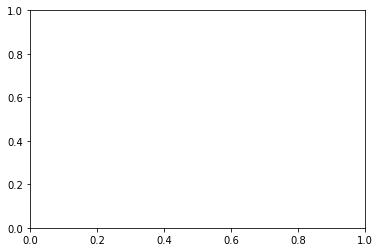

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

# Membuat relasi antara K dan akurasi ujinya
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

In [ ]:
# Class yang ada yaitu 0=setosa, 1=versicolor, 2=virginica
classes = {0:'sentosa',1:'versicolor',2:'virginica'}

# Membuat prediksi beberapa data yang tidak terlihat
# Memprediksi 2 terbawah dari observasi secara acak
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

#Klasifikasi Naive Bayes

Naive Bayes adalah metode yang cocok untuk klasifikasi biner dan multiclass. Metode yang juga dikenal sebagai Naive Bayes Classifier ini menerapkan teknik supervised klasifikasi objek di masa depan dengan menetapkan label kelas ke instance/catatan menggunakan probabilitas bersyarat. Probabilitas bersyarat adalah ukuran peluang suatu peristiwa yang terjadi berdasarkan peristiwa lain yang telah (dengan asumsi, praduga, pernyataan, atau terbukti) terjadi. 

P(A│B) = P(B│A)P(A)P(B)

Keterangan:

P(A│B) : Probabilitas A terjadi dengan bukti bahwa B telah terjadi (probabilitas superior)

P(B│A) : Probabilitas B terjadi dengan bukti bahwa A telah terjadi

P(A) : Peluang terjadinya A

P(B) : Peluang terjadinya B

In [ ]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/master/iris.csv')

In [ ]:
#looking at the first 5 values of the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/dewialqurani/datamining/main/iris_types.jpg')
img = Image.open(BytesIO(response.content))

In [ ]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa']], dtype=object)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))  

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333
